In [1]:
% matplotlib inline

import pandas as pd, numpy as np
import seaborn as sns
import utils.stats as stats
import utils.viz as viz
import statsmodels.formula.api as smf
import utils.viz as viz
from scipy.stats import shapiro
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

df_r = pd.read_pickle('/home/raid3/oligschlager/workspace/tractdist/data/df_regionwise.pkl')
df_p = pd.read_pickle('/home/raid3/oligschlager/workspace/tractdist/data/df_pairwise.pkl')

/home/raid3/oligschlager/anaconda2/envs/distconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df_r = df_r.rename(columns={'injection distance from nearest primary region': "dist_inj_prim",
                            'injection distance from nearest limbic region': "dist_inj_limb"})


## outcome variable: DLN ("raw")

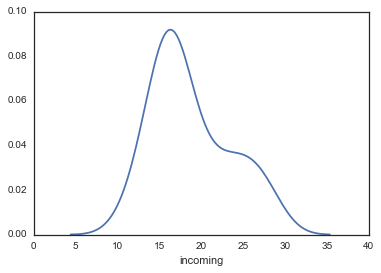

In [9]:
sns.distplot(df_r.incoming[~df_r.incoming.isnull()], hist=False)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


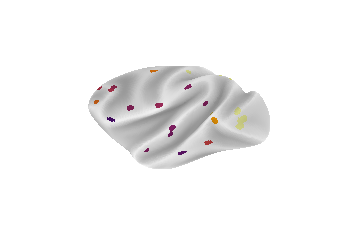

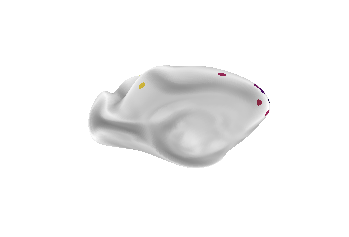

In [7]:
viz.plot_inj_yerkes(df_r, 'incoming', vmin=10, vmax=25)

## covariate: location (injection's distance from all vertices)

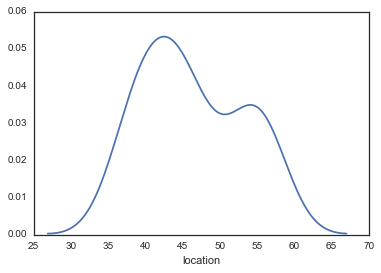

In [10]:
sns.distplot(df_r.location[~df_r.incoming.isnull()], hist=False)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


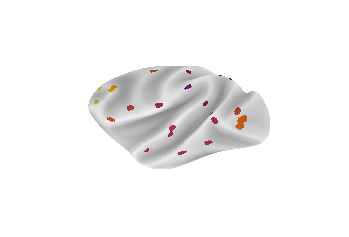

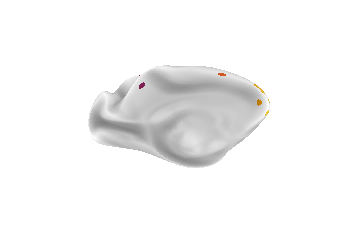

In [11]:
viz.plot_inj_yerkes(df_r, 'location', vmin=25, vmax=60)

## covariate: region size

(-200, 3500)

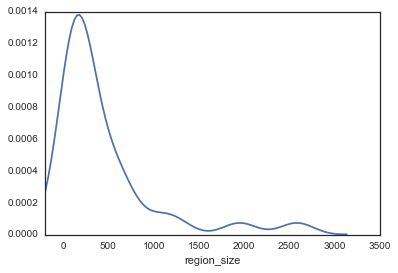

In [19]:
sns.distplot(df_r.region_size[~df_r.incoming.isnull()], hist=False)
plt.xlim(-200, 3500)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


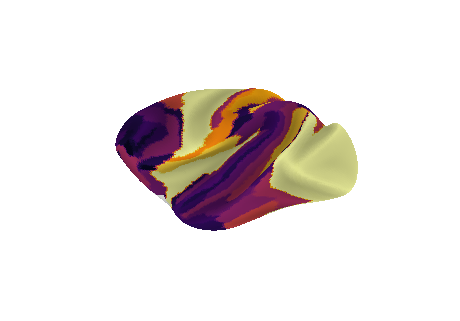

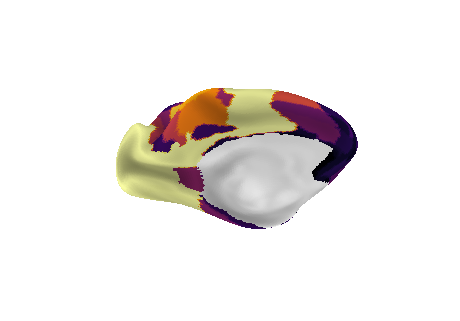

In [4]:
viz.plot_yerkes(df_r, 'region_size', vmin=0, vmax=800)

# Main analysis

In [54]:
def full_analysis(y):
    

    print '\nnull model'
    null = smf.ols(formula='%s ~ location \
                                 + region_size' % y, data=df_r).fit()
    print null.summary()

    print '\n\n\nfull model'
    full = smf.ols(formula='%s ~ location \
                                 + region_size \
                                 + dist_inj_limb \
                                 + dist_inj_prim' % y, data=df_r).fit()
    print full.summary()

    print '\n\n\n\nmodel assumptions'
    print '\n\nerror normally distributed?'
    print 'Shapiro test:', shapiro(full.resid)
    sns.distplot(full.resid)
    plt.show()

    print '\n\nheteroscedasticity?'
    sns.regplot(full.predict(), full.resid)
    plt.xlabel('observed Y')
    plt.ylabel('predicted Y')
    plt.show()
    
    print '\n\n\neffects'
    print '\n\nDLN as a function of distance from limbic regions'
    sns.regplot(df_r['dist_inj_limb'][~df_r['injection sites'].isnull()], 
                null.resid + df_r[y].mean())
    plt.ylabel('corrected DLN')
    plt.show()
    
    print '\nDLN against distance from primary regions'
    sns.regplot(df_r['dist_inj_prim'][~df_r['injection sites'].isnull()], 
                null.resid + df_r[y].mean())
    plt.ylabel('corrected DLN')
    plt.show()
    
    return null, full


null model
                            OLS Regression Results                            
Dep. Variable:               incoming   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     11.31
Date:                Thu, 11 May 2017   Prob (F-statistic):           0.000292
Time:                        12:16:18   Log-Likelihood:                -75.632
No. Observations:                  29   AIC:                             157.3
Df Residuals:                      26   BIC:                             161.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      27.3213      4.811     

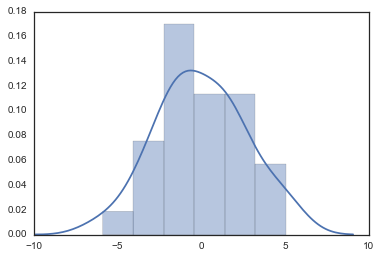



heteroscedasticity?


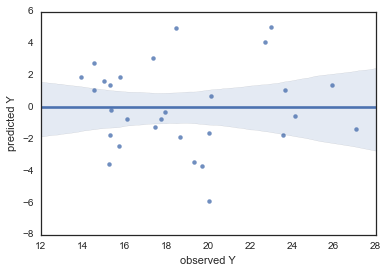




effects


DLN as a function of distance from limbic regions


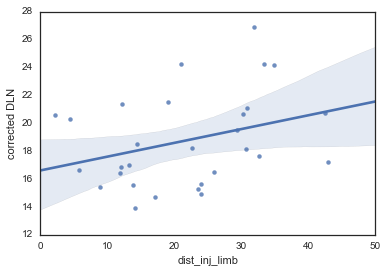


DLN against distance from primary regions


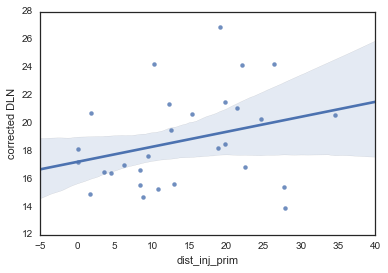

In [55]:
null, full = full_analysis('incoming')

## outcome variable: DLN (corrected)

In [57]:
df_r['temp'] = np.nan
df_r.temp[~df_r.incoming.isnull()] = null.resid + df_r.incoming.mean()

/nobackup/hunte1/sabine/anaconda2/envs/distconnect/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


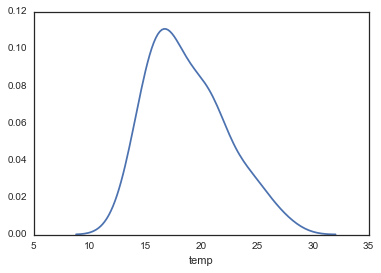

In [58]:
sns.distplot(df_r.temp[~df_r.incoming.isnull()], hist=False)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


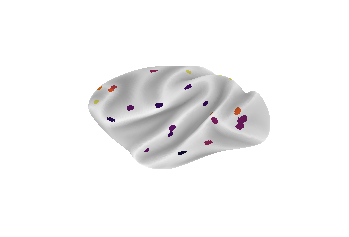

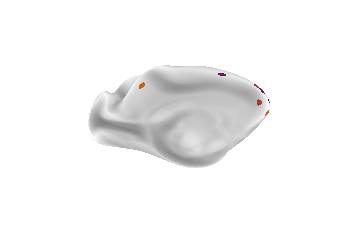

In [56]:
viz.plot_inj_yerkes(df_r, 'temp', vmin=13, vmax=25)

## test

In [5]:
def full_analysis(y):
    

    print '\nnull model'
    null = smf.ols(formula='%s ~ location \
                                 + region_size' % y, data=df_r).fit()
    print null.summary()

    print '\n\n\nfull model'
    full = smf.ols(formula='%s ~ + dist_inj_limb \
                                 + dist_inj_prim' % y, data=df_r).fit()
    print full.summary()

    print '\n\n\n\nmodel assumptions'
    print '\n\nerror normally distributed?'
    print 'Shapiro test:', shapiro(full.resid)
    sns.distplot(full.resid)
    plt.show()

    print '\n\nheteroscedasticity?'
    sns.regplot(full.predict(), full.resid)
    plt.xlabel('observed Y')
    plt.ylabel('predicted Y')
    plt.show()
    
    print '\n\n\neffects'
    print '\n\nDLN as a function of distance from limbic regions'
    sns.regplot(df_r['dist_inj_limb'][~df_r['injection sites'].isnull()], 
                null.resid + df_r[y].mean())
    plt.ylabel('corrected DLN')
    plt.show()
    
    print '\nDLN against distance from primary regions'
    sns.regplot(df_r['dist_inj_prim'][~df_r['injection sites'].isnull()], 
                null.resid + df_r[y].mean())
    plt.ylabel('corrected DLN')
    plt.show()
    
    return null, full


null model
                            OLS Regression Results                            
Dep. Variable:               incoming   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     11.31
Date:                Tue, 16 May 2017   Prob (F-statistic):           0.000292
Time:                        17:40:06   Log-Likelihood:                -75.632
No. Observations:                  29   AIC:                             157.3
Df Residuals:                      26   BIC:                             161.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      27.3213      4.811     

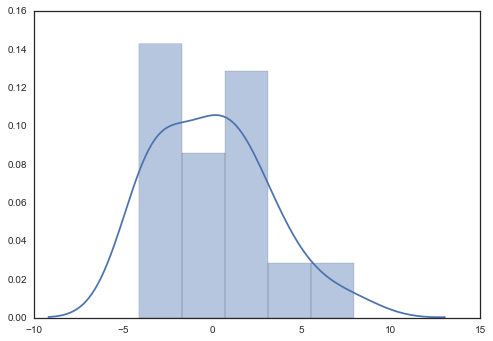



heteroscedasticity?


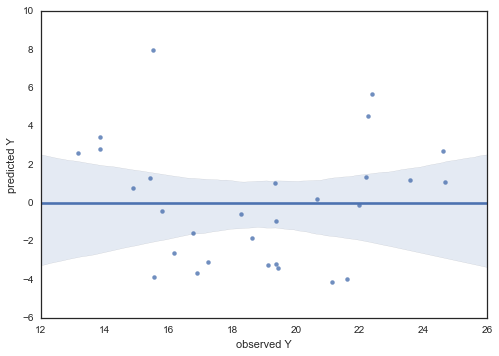




effects


DLN as a function of distance from limbic regions


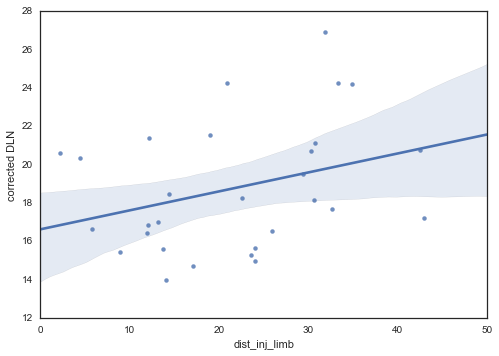


DLN against distance from primary regions


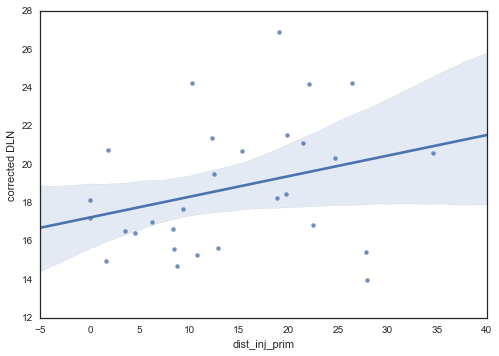

In [6]:
null, full = full_analysis('incoming')

In [ ]:
# also test this for euclidean dist

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


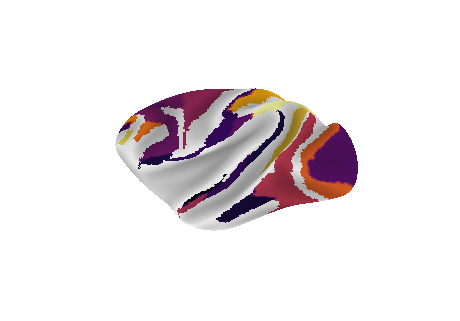

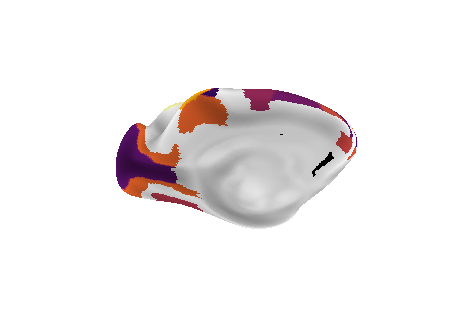

In [147]:
viz.plot_inj_yerkes(df_r, 'residuals', vmin=13, vmax=25)

## Euclidean distance

In [11]:
def full_analysis(y):
    

    print '\nnull model'
    null = smf.ols(formula='%s ~ location_eucl \
                                 + region_size' % y, data=df_r).fit()
    print null.summary()

    print '\n\n\nfull model'
    full = smf.ols(formula='%s ~ location_eucl \
                                 + region_size \
                                 + dist_inj_limb \
                                 + dist_inj_prim' % y, data=df_r).fit()
    print full.summary()

    print '\n\n\n\nmodel assumptions'
    print '\n\nerror normally distributed?'
    print 'Shapiro test:', shapiro(full.resid)
    sns.distplot(full.resid)
    plt.show()

    print '\n\nheteroscedasticity?'
    sns.regplot(full.predict(), full.resid)
    plt.xlabel('observed Y')
    plt.ylabel('predicted Y')
    plt.show()
    
    print '\n\n\neffects'
    print '\n\nDLN as a function of distance from limbic regions'
    sns.regplot(df_r['dist_inj_limb'][~df_r['injection sites'].isnull()], 
                null.resid + df_r[y].mean())
    plt.ylabel('corrected DLN')
    plt.show()
    
    print '\nDLN against distance from primary regions'
    sns.regplot(df_r['dist_inj_prim'][~df_r['injection sites'].isnull()], 
                null.resid + df_r[y].mean())
    plt.ylabel('corrected DLN')
    plt.show()
    
    return null, full


null model
                            OLS Regression Results                            
Dep. Variable:          incoming_eucl   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     6.966
Date:                Thu, 11 May 2017   Prob (F-statistic):            0.00378
Time:                        18:58:40   Log-Likelihood:                -50.645
No. Observations:                  29   AIC:                             107.3
Df Residuals:                      26   BIC:                             111.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        18.7649      2.03

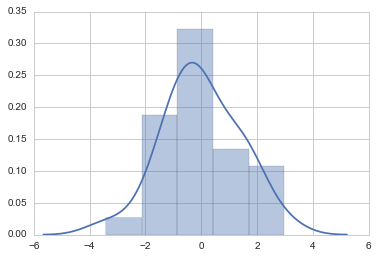



heteroscedasticity?


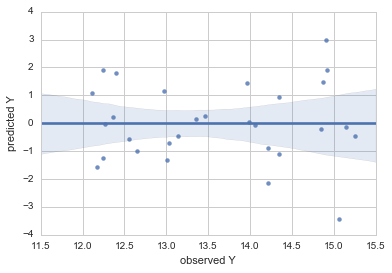




effects


DLN as a function of distance from limbic regions


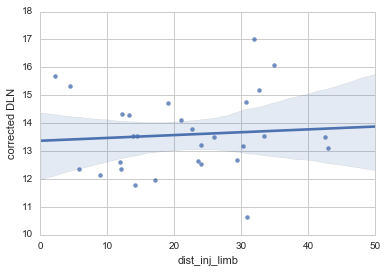


DLN against distance from primary regions


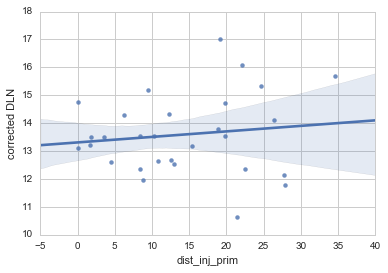

In [12]:
null, full = full_analysis('incoming_eucl')

In [6]:
df_r.columns.values


array(['area', 'injection sites', 'vertices',
       'nearest primary region from injection site',
       'injection distance from nearest primary region',
       'average nearest primary region',
       'average distance from nearest primary region',
       'nearest limbic region from injection site',
       'injection distance from nearest limbic region',
       'average nearest limbic region',
       'average distance from nearest limbic region', 'incoming_mindist',
       'incoming', 'outgoing_mindist', 'outgoing', 'region_size',
       'location', 'dist_from_injs', 'incoming_tdist', 'outgoing_tdist',
       'location_eucl', 'gdist_from_injs', 'edist_from_injs',
       'incoming_eucl', 'outgoing_eucl'], dtype=object)

In [7]:
'incoming_eucl' in df_r.columns.values

True